In [ ]:
#hello, here we are again! Today we will use a neural network to try and predict some values
#We are using the UniversalBank dataset, and I think it would be fun to try to again predict the CreditCard property,
#To see how it stacks up against the logistic regression and the Decision tree we made for this.

In [22]:
#Firtly, let's load the libraries I presume we need.
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout


In [23]:
#Okay, let's load the dataset, just like we did previously
# Load the dataset
absolute_path = (str(os.path.abspath('')))
parent_path = os.path.dirname(absolute_path)
relative_path = "Datasets/UniversalBank.csv"
dataset_path = os.path.join(parent_path, relative_path)
print(dataset_path)

# Read the dataset
df = pd.read_csv(dataset_path)

c:\Users\jordy\Data science\DSopdrachten\Datasets/UniversalBank.csv


In [24]:
#Before we do anything, let us pick our target variable.
X = df.drop(columns=['CreditCard'])
y = df['CreditCard']

In [25]:
#Since we are dealing with neural networks, lets do some preprosessing.
#Remove ID dimension
df = df.drop(columns=['ID'])

#Select neumerical columns that we want standardized and categorical columns we want encoded
numerical_columns = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage']
categorical_columns = ['Personal Loan', 'Securities Account', 'CD Account', 'Online']

#Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)])

In [26]:
#Looks good to me, now let us split our dataset into some training data and testdata
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
#let's create our preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [47]:
# Preprocess the data
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [29]:
# Build the neural network
# We will play around with the variables later to see if we can optimise our results
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
# Train the model
trained_model = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
100/100 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.7406 - val_loss: 0.5537 - val_accuracy: 0.7525
Epoch 2/50
100/100 [==============================] - 0s 1ms/step - loss: 0.5377 - accuracy: 0.7416 - val_loss: 0.5511 - val_accuracy: 0.7525
Epoch 3/50
100/100 [==============================] - 0s 1ms/step - loss: 0.5353 - accuracy: 0.7409 - val_loss: 0.5534 - val_accuracy: 0.7550
Epoch 4/50
100/100 [==============================] - 0s 1ms/step - loss: 0.5337 - accuracy: 0.7434 - val_loss: 0.5551 - val_accuracy: 0.7538
Epoch 5/50
100/100 [==============================] - 0s 1ms/step - loss: 0.5387 - accuracy: 0.7409 - val_loss: 0.5499 - val_accuracy: 0.7513
Epoch 6/50
100/100 [==============================] - 0s 1ms/step - loss: 0.5341 - accuracy: 0.7428 - val_loss: 0.5550 - val_accuracy: 0.7513
Epoch 7/50
100/100 [==============================] - 0s 1ms/step - loss: 0.5363 - accuracy: 0.7416 - val_loss: 0.5570 - val_accuracy: 0.7525
Epoch 

In [37]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

#0.75 accuracy right out of the box is pretty good, let's see later if we can improve upon it

32/32 [==============================] - 0s 839us/step - loss: 0.5568 - accuracy: 0.7480
Test Accuracy: 0.75


In [38]:
#But before we try and improve the model, let's make some predictions
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)
print(predicted_classes[:10])

32/32 [==============================] - 0s 725us/step
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


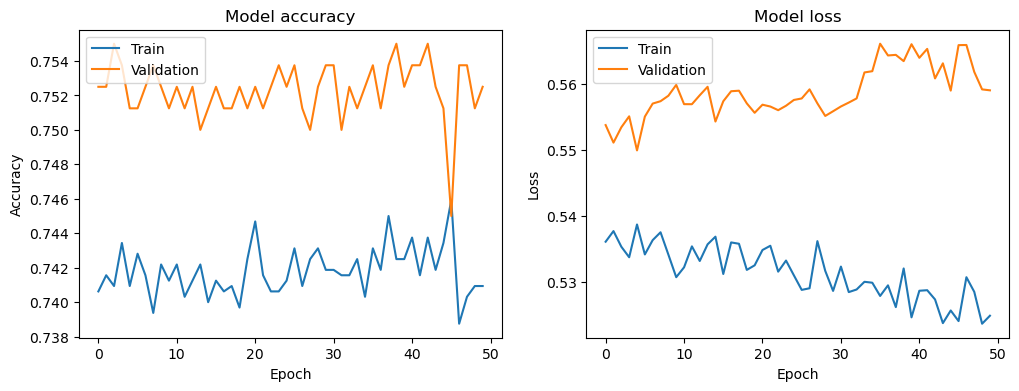

32/32 [==============================] - 0s 1ms/step


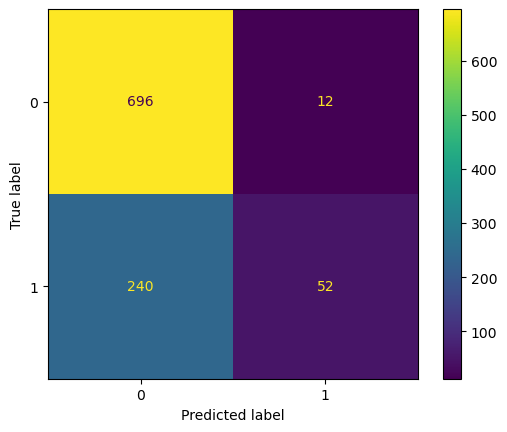

32/32 [==============================] - 0s 791us/step


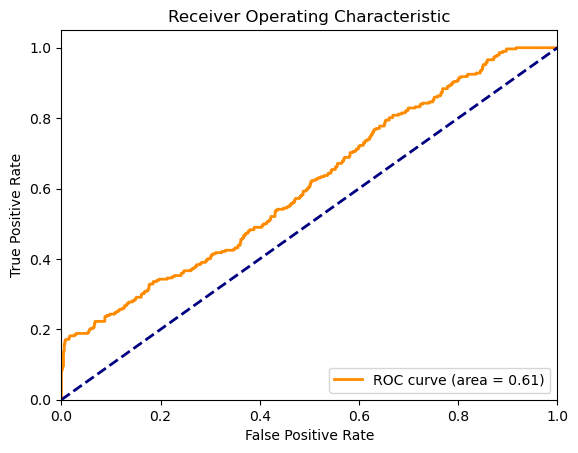

32/32 [==============================] - 0s 743us/step


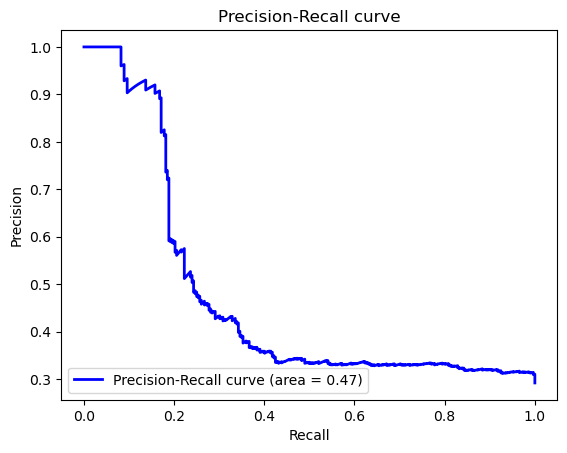

In [39]:
# lets visualize our performance metrics to see how we are doing and where we can improve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score
# Learning Curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(trained_model.history['accuracy'])
plt.plot(trained_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Confusion Matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, model.predict(X_test))
average_precision = average_precision_score(y_test, model.predict(X_test))
plt.figure()
plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

In [43]:
#Cool graphs and all, but let's try and derive some conclusions.

#Firstly, let's analyze the accuracy and loss plots. 
    #Accuracy:
    #Validation Accuracy: ~0.752 (75.2%)
    #Training Accuracy: ~0.742 (74.2%)
    #The validation and training accuracy are quite close to eachother, which indicates that the model is not
    #underfitting or overfitting significantly, which is good!

    #Loss:
    #Validation Loss: ~0.565
    #Training Loss: ~0.532
    #The validation and training loss are also quite close, which indicates that the model is pretty well generalized
    #which means that the model responds pretty well to unseen data.

#Secondly, the confusiong matrix
    #TN = 696
    #FP = 12
    #FN = 240
    #TP = 52
    #Here we see a similar trend as with the logistic regression, with an extremely high rate of False negatives (=240)
    #We might need to either address class imbalance or try to adjust the decision treshold.
    # I fear this might be futile, since doing this on the logistic regression part was pain.

#Thirdly, let's analyze our RoC
    #ROC curve = 0.61
    #This is expected from our confusion matrix, an roc curve of 0.61 is only slightly better than random guessing (AUC = 0.5), which means the model is bad and not
    #effectively differentiation between positives and negatives.
    #To combat this we might need to do some hyper parameter tuning, balancing or better feature selection.
    #I doubt this is due to over/underfitting since that would show in the accuracy/loss plots

#lastly, precion-recall curve
    # The precision recall curve gives an area of 0.47
    #similarly as the confusion matrix and RoC it shows that he model is not performing well at distinguishing between positive and negative.
    #To combat this we might need to try balancing, which I fear will prove futile, or we could try hyperparameter optimization and/or ensemble methods

#Next steps:
    #1. Try addressing class imbalance using SMOTE.
    #2. Try hyperparameter tuning
    #3. Try to improve the feature selection
    #4. Try an ensemble method.


c:\Users\jordy\Data science\DSopdrachten\Datasets/UniversalBank.csv
Epoch 1/50
142/142 [==============================] - 1s 3ms/step - loss: 0.6717 - accuracy: 0.6086 - val_loss: 0.8747 - val_accuracy: 0.0709
Epoch 2/50
142/142 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.6368 - val_loss: 0.8273 - val_accuracy: 0.1346
Epoch 3/50
142/142 [==============================] - 0s 1ms/step - loss: 0.6463 - accuracy: 0.6439 - val_loss: 0.9398 - val_accuracy: 0.1293
Epoch 4/50
142/142 [==============================] - 0s 1ms/step - loss: 0.6366 - accuracy: 0.6563 - val_loss: 0.8502 - val_accuracy: 0.1470
Epoch 5/50
142/142 [==============================] - 0s 1ms/step - loss: 0.6260 - accuracy: 0.6631 - val_loss: 0.8891 - val_accuracy: 0.1391
Epoch 6/50
142/142 [==============================] - 0s 1ms/step - loss: 0.6212 - accuracy: 0.6633 - val_loss: 0.7952 - val_accuracy: 0.1630
Epoch 7/50
142/142 [==============================] - 0s 1ms/step - loss: 0.6190

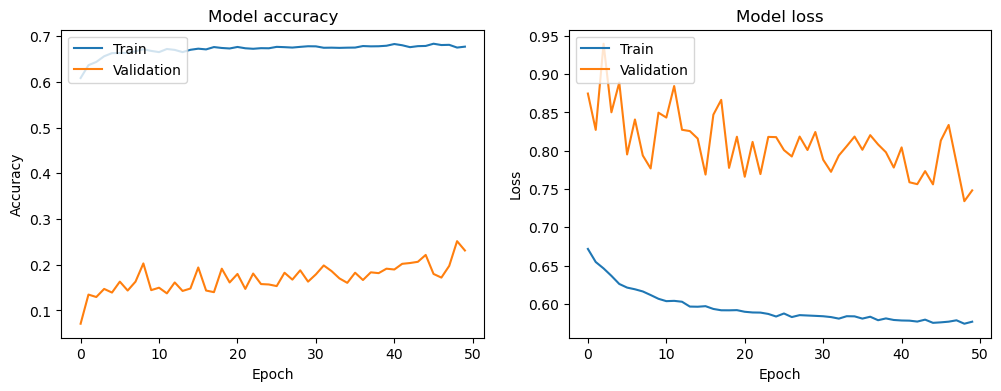

32/32 [==============================] - 0s 678us/step


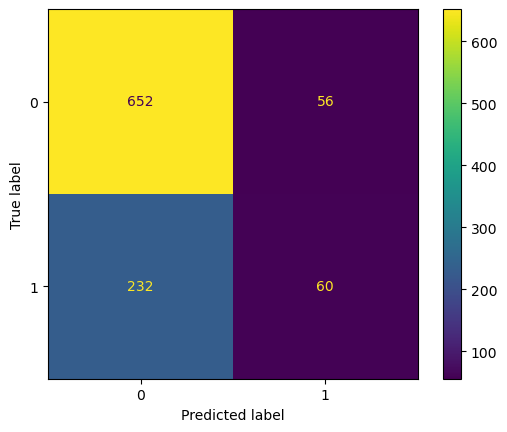

32/32 [==============================] - 0s 726us/step


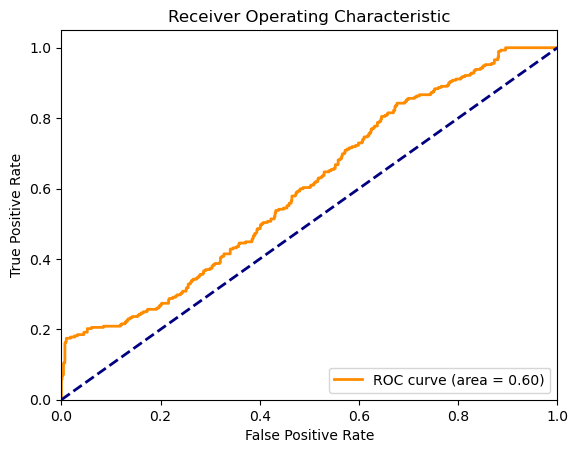

32/32 [==============================] - 0s 680us/step


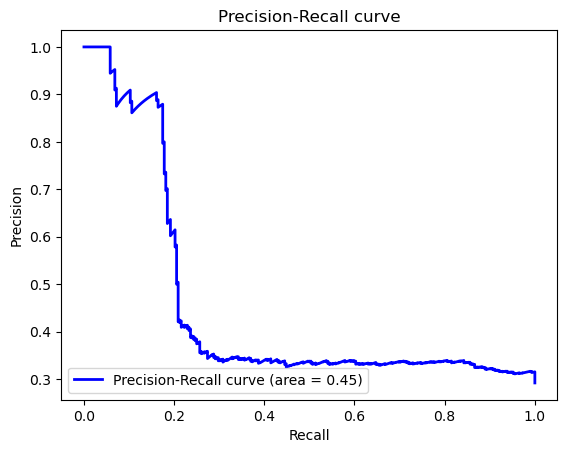

In [50]:
#Let's try to improve our model using a balancing technique called SMOTE
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score

# Load the dataset
absolute_path = str(os.path.abspath(''))
parent_path = os.path.dirname(absolute_path)
relative_path = "Datasets/UniversalBank.csv"
dataset_path = os.path.join(parent_path, relative_path)
print(dataset_path)

# Read the dataset
df = pd.read_csv(dataset_path)

# Before we do anything, let us pick our target variable.
X = df.drop(columns=['CreditCard'])
y = df['CreditCard']

# Since we are dealing with neural networks, let's do some preprocessing.
# Remove ID dimension
X = X.drop(columns=['ID'])

# Select numerical columns that we want standardized and categorical columns we want encoded
numerical_columns = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage']
categorical_columns = ['Personal Loan', 'Securities Account', 'CD Account', 'Online']

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Build the neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
trained_model = model.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Learning Curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(trained_model.history['accuracy'])
plt.plot(trained_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Confusion Matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, model.predict(X_test))
average_precision = average_precision_score(y_test, model.predict(X_test))
plt.figure()
plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()


In [51]:
#Alright, as predicted, balancing proves futile because of the following reasons:
    #1. It did not positively impact the model's ability to correctly identify negative and positive classes.
    #2. The accuracy/loss characteristic took a big hit. 
    #Conclusion: Balancing with Smote is not the way to go

c:\Users\jordy\Data science\DSopdrachten\Datasets/UniversalBank.csv


C:\Users\jordy\AppData\Local\Temp\ipykernel_9456\2145187011.py:64: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best: 0.744002 using {'activation': 'tanh', 'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 50, 'optimizer': 'rmsprop'}
32/32 [==============================] - 0s 872us/step - loss: 0.5403 - accuracy: 0.7500
Test Accuracy: 0.75


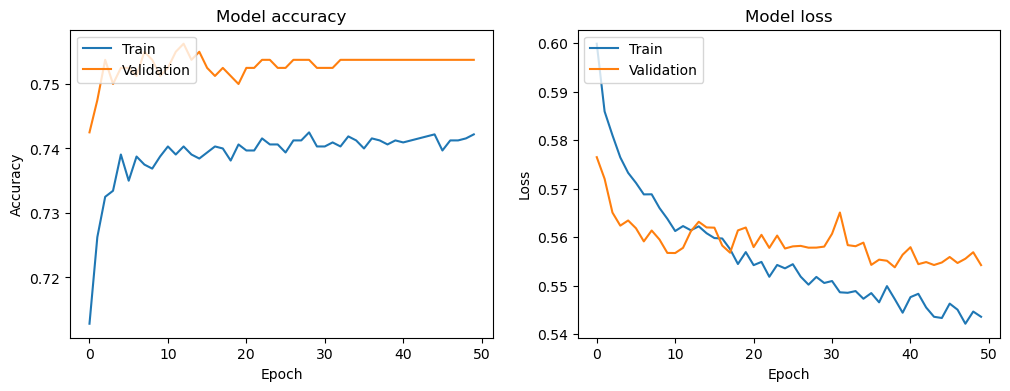

32/32 [==============================] - 0s 840us/step


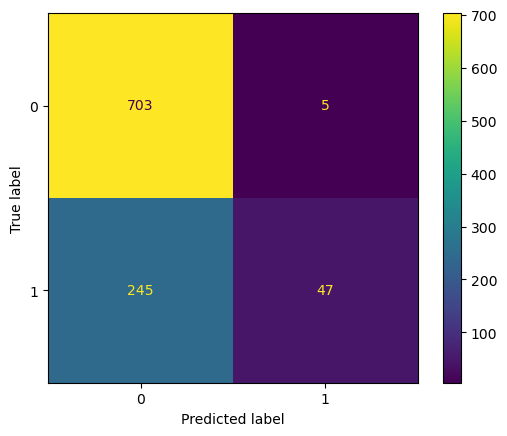

32/32 [==============================] - 0s 710us/step


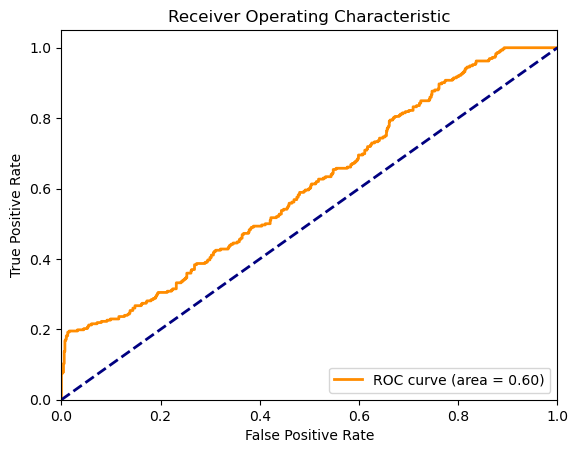

32/32 [==============================] - 0s 710us/step


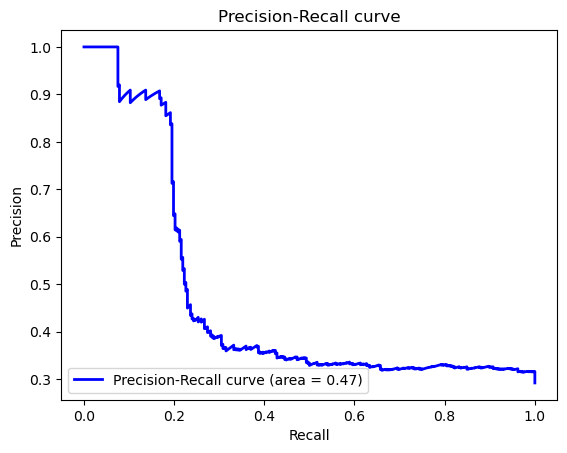

In [53]:
#No worries, we still have other tricks up our sleeve we can use, let's try hyper paramater tuning
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score

# Load the dataset
absolute_path = (str(os.path.abspath('')))
parent_path = os.path.dirname(absolute_path)
relative_path = "Datasets/UniversalBank.csv"
dataset_path = os.path.join(parent_path, relative_path)
print(dataset_path)

# Read the dataset
df = pd.read_csv(dataset_path)

# Before we do anything, let us pick our target variable.
X = df.drop(columns=['CreditCard'])
y = df['CreditCard']

# Remove ID column
df = df.drop(columns=['ID'])

# Select numerical columns that we want standardized and categorical columns we want encoded
numerical_columns = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage']
categorical_columns = ['Personal Loan', 'Securities Account', 'CD Account', 'Online']

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Define a function to create the model (needed for KerasClassifier)
def create_model(optimizer='adam', activation='relu', dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid search parameters
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100],
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh'],
    'dropout_rate': [0.3, 0.5, 0.7]
}

# Create GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Fit the model
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Get the best model
best_model = grid_result.best_estimator_.model

# Evaluate the best model
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Train the best model and get the history for visualization
history = grid_result.best_estimator_.fit(X_train, y_train, epochs=grid_result.best_params_['epochs'], batch_size=grid_result.best_params_['batch_size'], validation_split=0.2)

# Visualize performance metrics
# Learning Curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Confusion Matrix
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, best_model.predict(X_test))
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, best_model.predict(X_test))
average_precision = average_precision_score(y_test, best_model.predict(X_test))
plt.figure()
plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

c:\Users\jordy\Data science\DSopdrachten\Datasets/UniversalBank.csv


C:\Users\jordy\AppData\Local\Temp\ipykernel_9456\1485751629.py:74: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best: 0.744252 using {'activation': 'relu', 'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 100, 'l2_lambda': 0.01, 'optimizer': 'adam'}
32/32 [==============================] - 0s 837us/step - loss: 0.5607 - accuracy: 0.7530
Test Accuracy: 0.75


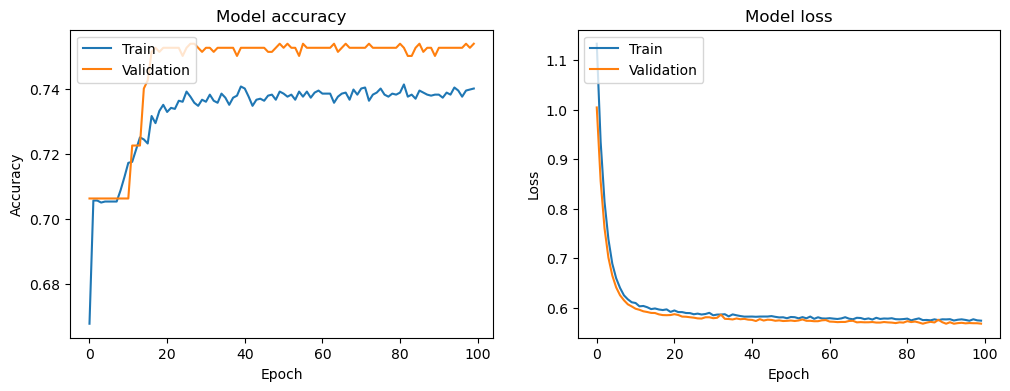

32/32 [==============================] - 0s 799us/step


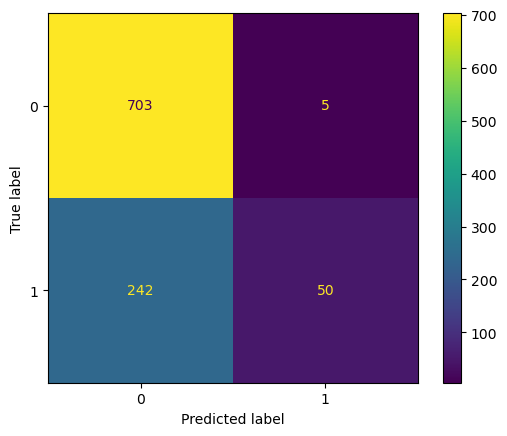

32/32 [==============================] - 0s 709us/step


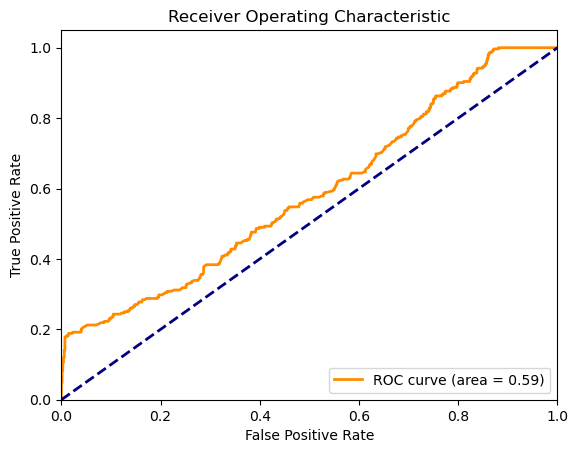

32/32 [==============================] - 0s 678us/step


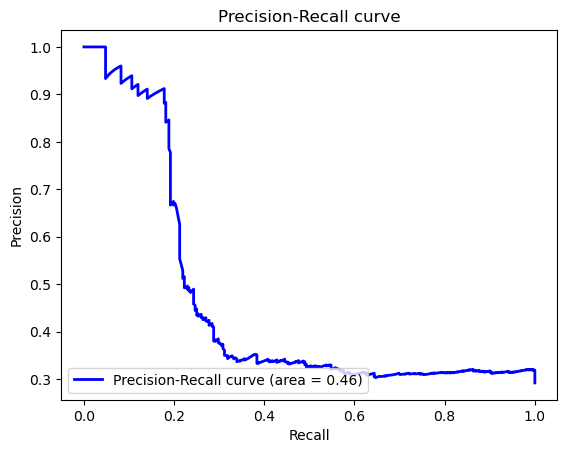

In [56]:
#Okay, this is starting to look better, but still not great.
#Our accuracy remains the same, but! we have a slightly better looking confusion matrix, which I count as a win.
#I say we improve upon this model
#let's try to add feature selection and advanced regularization using l2_lambda to prevent overfitting and add it to the hyperparameter tuning
#note, that this is becoming quite time-intensive to run, even with an overclocked Ryzen 7 5800X3d cpu
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score

# Load the dataset
absolute_path = (str(os.path.abspath('')))
parent_path = os.path.dirname(absolute_path)
relative_path = "Datasets/UniversalBank.csv"
dataset_path = os.path.join(parent_path, relative_path)
print(dataset_path)

# Read the dataset
df = pd.read_csv(dataset_path)

# Before we do anything, let us pick our target variable.
X = df.drop(columns=['CreditCard'])
y = df['CreditCard']

# Remove ID column
df = df.drop(columns=['ID'])

# Select numerical columns that we want standardized and categorical columns we want encoded
numerical_columns = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage']
categorical_columns = ['Personal Loan', 'Securities Account', 'CD Account', 'Online']

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Feature Selection
selector = SelectKBest(f_classif, k=10)  # Adjust 'k' based on your dataset
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

# Define a function to create the model (needed for KerasClassifier)
def create_model(optimizer='adam', activation='relu', dropout_rate=0.5, l2_lambda=0.01):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation=activation, kernel_regularizer=tf.keras.regularizers.l2(l2_lambda)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation=activation, kernel_regularizer=tf.keras.regularizers.l2(l2_lambda)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid search parameters
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100],
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh'],
    'dropout_rate': [0.3, 0.5, 0.7],
    'l2_lambda': [0.01, 0.001, 0.0001]
}

# Create GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Fit the model
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Get the best model
best_model = grid_result.best_estimator_.model

# Evaluate the best model
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Train the best model and get the history for visualization
history = grid_result.best_estimator_.fit(X_train, y_train, epochs=grid_result.best_params_['epochs'], batch_size=grid_result.best_params_['batch_size'], validation_split=0.2)

# Visualize performance metrics
# Learning Curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Confusion Matrix
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, best_model.predict(X_test))
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, best_model.predict(X_test))
average_precision = average_precision_score(y_test, best_model.predict(X_test))
plt.figure()
plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

In [61]:
#Again, let's analyze the results
#Firstly, let's analyze the accuracy and loss plots. 
    #Accuracy:
    #Validation Accuracy: ~0.756 
    #Training Accuracy: ~0.74 
    #The validation and training accuracy are quite close to eachother, which indicates that the model is not
    #underfitting or overfitting significantly, which is good!

    #Loss:
    #Validation Loss: ~0.6
    #Training Loss: ~0.6
    #The validation and training loss are also quite close, which indicates that the model is pretty well generalized
    #which means that the model responds pretty well to unseen data.

#Secondly, the confusiong matrix
    #TN = 703
    #FP = 5
    #FN = 242
    #TP = 50
    #Here we see a similar trend as with the logistic regression, with an extremely high rate of False negatives (=240)
    #We might need to either address class imbalance or try to adjust the decision treshold.
    # I fear this might be futile, since doing this on the logistic regression part was pain.

#Thirdly, let's analyze our RoC
    #ROC curve = 0.59
    #This is expected from our confusion matrix, an roc curve of 0.59 is only slightly better than random guessing (AUC = 0.5), which means the model is bad and not
    #effectively differentiation between positives and negatives.
    #To combat this we might need to do some hyper parameter tuning, balancing or better feature selection.
    #I doubt this is due to over/underfitting since that would show in the accuracy/loss plots

#lastly, precion-recall curve
    # The precision recall curve gives an area of 0.46
    #similarly as the confusion matrix and RoC it shows that he model is not performing well at distinguishing between positive and negative.
    #To combat this we might need to try balancing, which I fear will prove futile, or we could try hyperparameter optimization and/or ensemble methods

#Conclusion
#The model shows minor improvements in validation accuracy and a significant reduction in false positives, 
# but the high rate of false negatives and the slight decrease in AUC and average precision indicate that there is still room for improvement.
#The improved model performs slightly better in certain aspects (like reducing false positives) but not in others (like detecting positives).

#What's next?
#1. Treshold Adjustment
#2. Ensemble Methods


c:\Users\jordy\Data science\DSopdrachten\Datasets/UniversalBank.csv
Epoch 1/50
100/100 [==============================] - 1s 3ms/step - loss: 0.6266 - accuracy: 0.7003 - val_loss: 0.6129 - val_accuracy: 0.7063
Epoch 2/50
100/100 [==============================] - 0s 1ms/step - loss: 0.6098 - accuracy: 0.7044 - val_loss: 0.6115 - val_accuracy: 0.7075
Epoch 3/50
100/100 [==============================] - 0s 1ms/step - loss: 0.6030 - accuracy: 0.7116 - val_loss: 0.6051 - val_accuracy: 0.7188
Epoch 4/50
100/100 [==============================] - 0s 1ms/step - loss: 0.5950 - accuracy: 0.7147 - val_loss: 0.5982 - val_accuracy: 0.7337
Epoch 5/50
100/100 [==============================] - 0s 1ms/step - loss: 0.5883 - accuracy: 0.7228 - val_loss: 0.5940 - val_accuracy: 0.7462
Epoch 6/50
100/100 [==============================] - 0s 1ms/step - loss: 0.5848 - accuracy: 0.7225 - val_loss: 0.5807 - val_accuracy: 0.7487
Epoch 7/50
100/100 [==============================] - 0s 1ms/step - loss: 0.5799

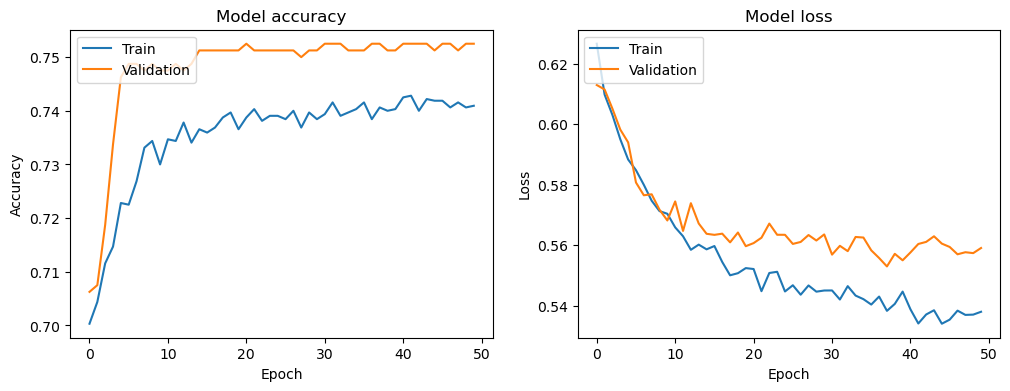

32/32 [==============================] - 0s 694us/step
Threshold: 0.0, Precision: 0.29, Recall: 1.00, F1 Score: 0.45
Threshold: 0.1, Precision: 0.31, Recall: 0.99, F1 Score: 0.48
Threshold: 0.2, Precision: 0.31, Recall: 0.96, F1 Score: 0.47
Threshold: 0.3, Precision: 0.34, Recall: 0.62, F1 Score: 0.44
Threshold: 0.4, Precision: 0.62, Recall: 0.19, F1 Score: 0.29
Threshold: 0.5, Precision: 0.91, Recall: 0.17, F1 Score: 0.29
Threshold: 0.6, Precision: 0.90, Recall: 0.16, F1 Score: 0.27
Threshold: 0.7, Precision: 0.90, Recall: 0.16, F1 Score: 0.27
Threshold: 0.8, Precision: 0.89, Recall: 0.14, F1 Score: 0.25
Threshold: 0.9, Precision: 0.96, Recall: 0.08, F1 Score: 0.15
Threshold: 1.0, Precision: 0.00, Recall: 0.00, F1 Score: 0.00
Optimal threshold: 0.10


c:\Users\jordy\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [63]:
#Firstly, let's find the optimal treshold on the basemodel to save some time
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score, precision_score, recall_score, f1_score

# Load the dataset
absolute_path = str(os.path.abspath(''))
parent_path = os.path.dirname(absolute_path)
relative_path = "Datasets/UniversalBank.csv"
dataset_path = os.path.join(parent_path, relative_path)
print(dataset_path)

# Read the dataset
df = pd.read_csv(dataset_path)

# Before we do anything, let us pick our target variable.
X = df.drop(columns=['CreditCard'])
y = df['CreditCard']

# Since we are dealing with neural networks, let's do some preprocessing.
# Remove ID dimension
X = X.drop(columns=['ID'])

# Select numerical columns that we want standardized and categorical columns we want encoded
numerical_columns = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage']
categorical_columns = ['Personal Loan', 'Securities Account', 'CD Account', 'Online']

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Build the neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
trained_model = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Learning Curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(trained_model.history['accuracy'])
plt.plot(trained_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Get predicted probabilities
y_pred_prob = model.predict(X_test)

# Initialize lists to store metrics for each threshold
thresholds = np.arange(0, 1.1, 0.1)
precision_scores = []
recall_scores = []
f1_scores = []

# Evaluate metrics for each threshold
for threshold in thresholds:
    y_pred = (y_pred_prob >= threshold).astype("int32")
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    print(f'Threshold: {threshold:.1f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}')

# Find the optimal threshold
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f'Optimal threshold: {optimal_threshold:.2f}')

# Make predictions using the optimal threshold
y_pred_optimal = (y_pred_prob >= optimal_threshold).astype("int32")


c:\Users\jordy\Data science\DSopdrachten\Datasets/UniversalBank.csv
Epoch 1/50
100/100 [==============================] - 1s 3ms/step - loss: 0.6417 - accuracy: 0.6566 - val_loss: 0.6053 - val_accuracy: 0.7063
Epoch 2/50
100/100 [==============================] - 0s 1ms/step - loss: 0.6100 - accuracy: 0.7044 - val_loss: 0.5989 - val_accuracy: 0.7063
Epoch 3/50
100/100 [==============================] - 0s 1ms/step - loss: 0.6020 - accuracy: 0.7088 - val_loss: 0.5922 - val_accuracy: 0.7075
Epoch 4/50
100/100 [==============================] - 0s 1ms/step - loss: 0.5996 - accuracy: 0.7075 - val_loss: 0.5881 - val_accuracy: 0.7175
Epoch 5/50
100/100 [==============================] - 0s 1ms/step - loss: 0.5907 - accuracy: 0.7109 - val_loss: 0.5816 - val_accuracy: 0.7250
Epoch 6/50
100/100 [==============================] - 0s 1ms/step - loss: 0.5871 - accuracy: 0.7197 - val_loss: 0.5776 - val_accuracy: 0.7350
Epoch 7/50
100/100 [==============================] - 0s 1ms/step - loss: 0.5772

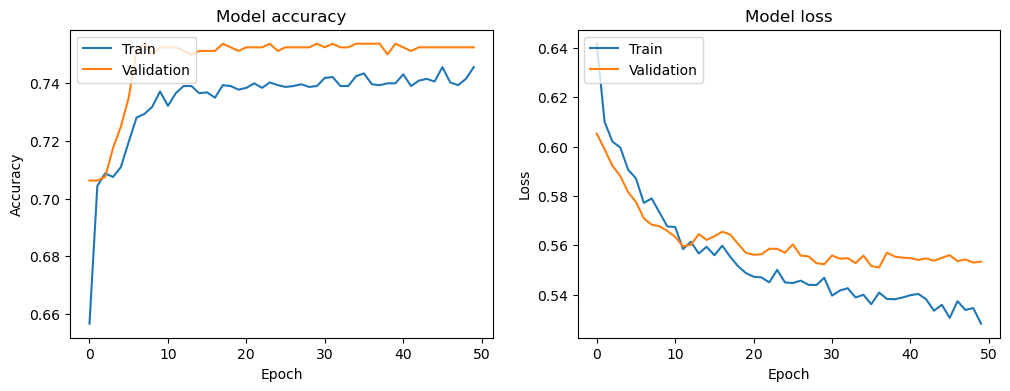


Evaluating threshold: 0.1
32/32 [==============================] - 0s 694us/step


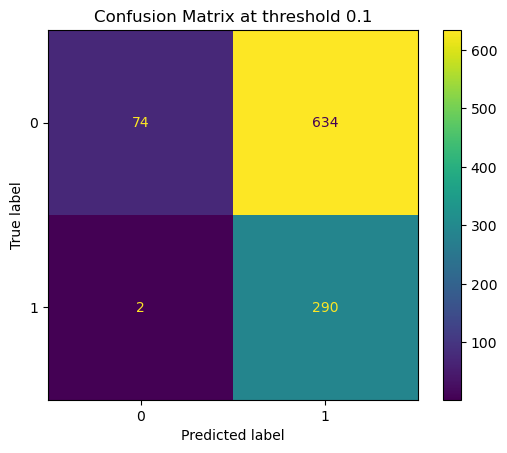

32/32 [==============================] - 0s 2ms/step


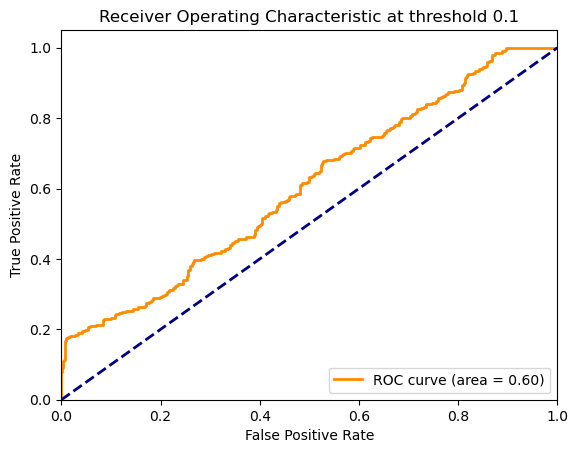

32/32 [==============================] - 0s 740us/step


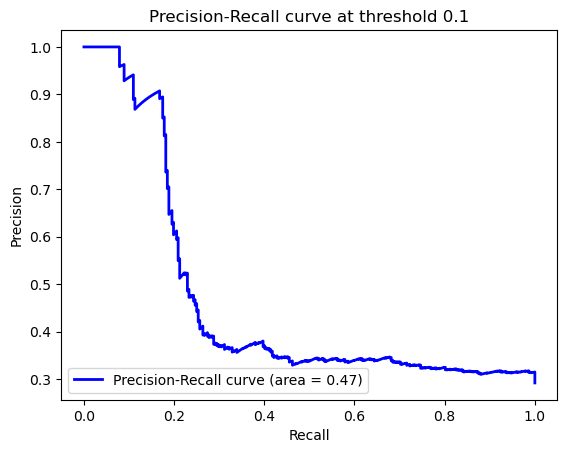


Evaluating threshold: 0.2
32/32 [==============================] - 0s 707us/step


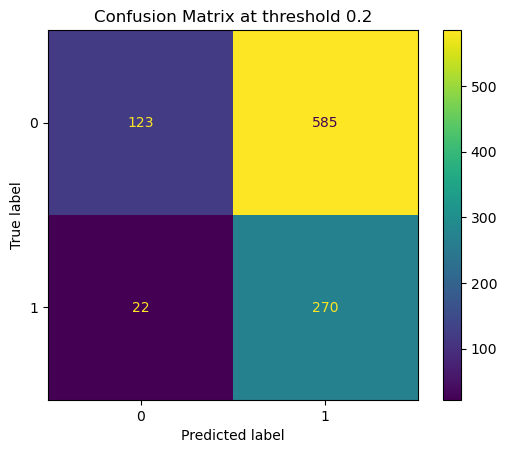

32/32 [==============================] - 0s 693us/step


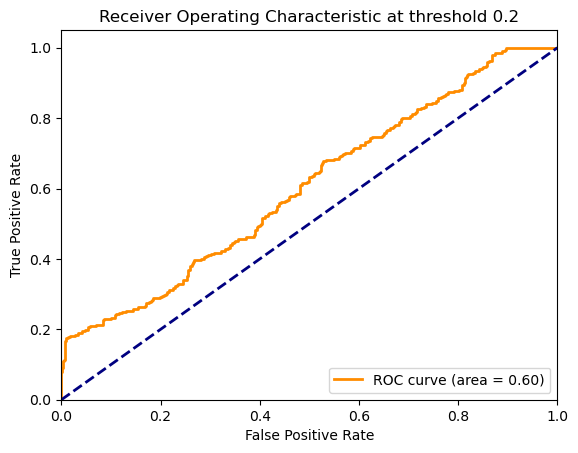

32/32 [==============================] - 0s 694us/step


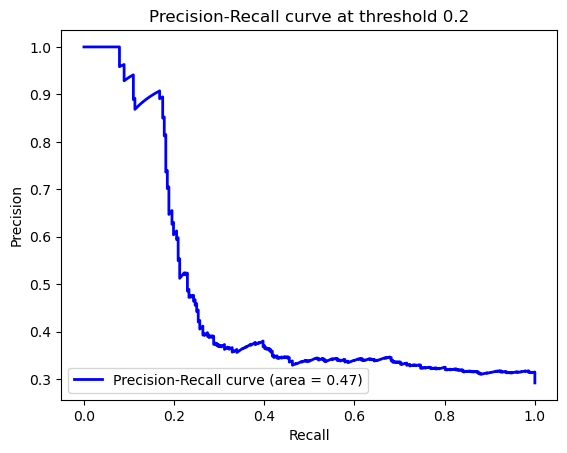


Evaluating threshold: 0.3
32/32 [==============================] - 0s 737us/step


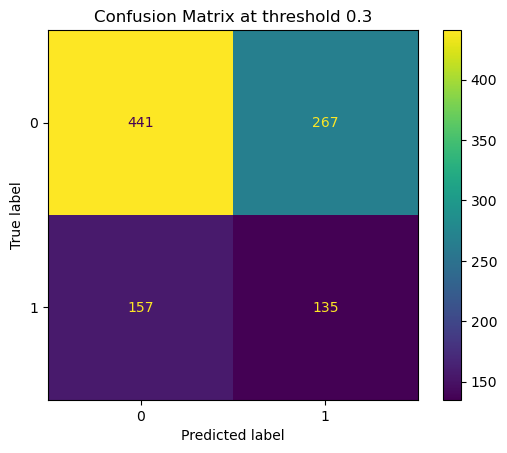

32/32 [==============================] - 0s 694us/step


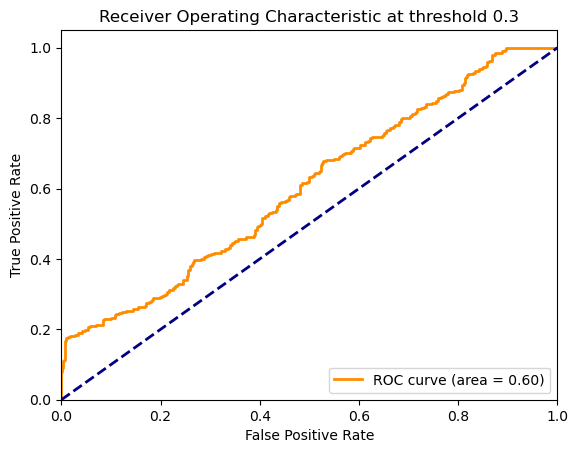

32/32 [==============================] - 0s 710us/step


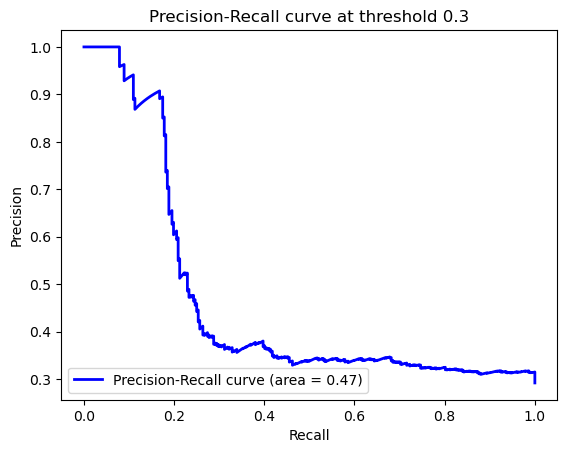


Evaluating threshold: 0.4
32/32 [==============================] - 0s 682us/step


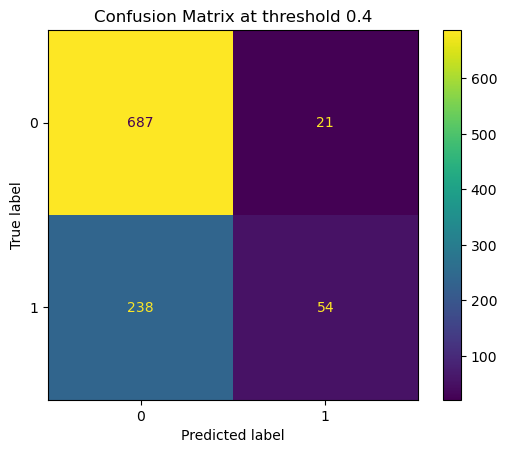

32/32 [==============================] - 0s 711us/step


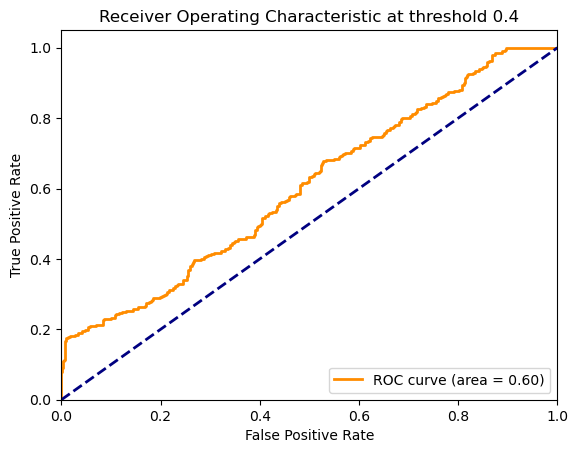

32/32 [==============================] - 0s 694us/step


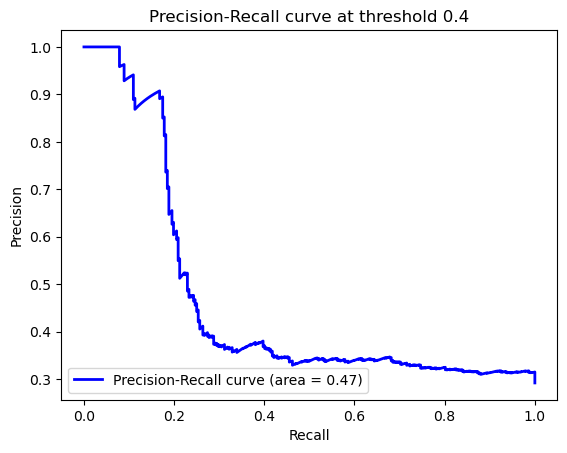


Evaluating threshold: 0.5
32/32 [==============================] - 0s 727us/step


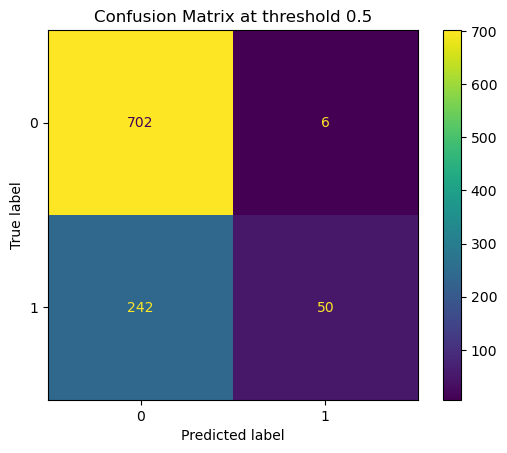

32/32 [==============================] - 0s 724us/step


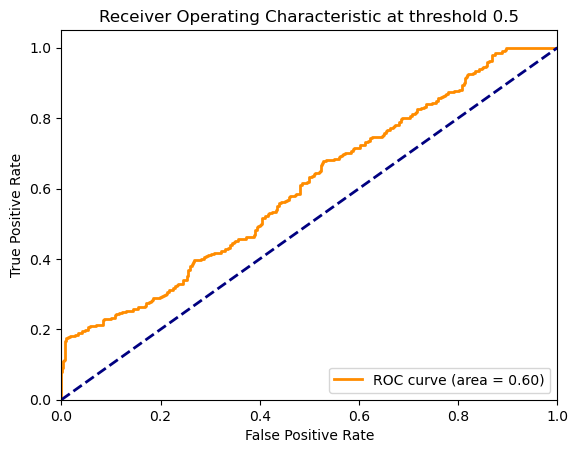

32/32 [==============================] - 0s 727us/step


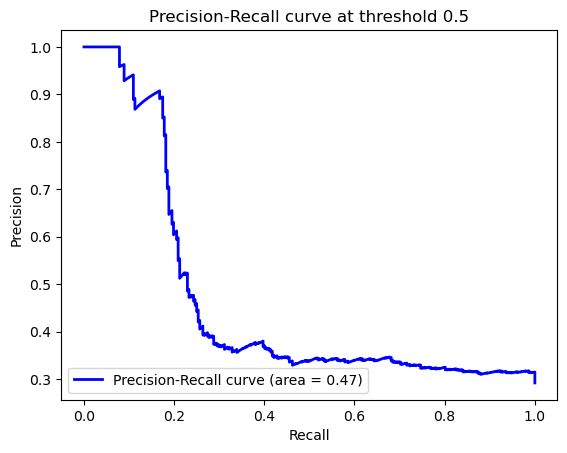


Evaluating threshold: 0.6
32/32 [==============================] - 0s 726us/step


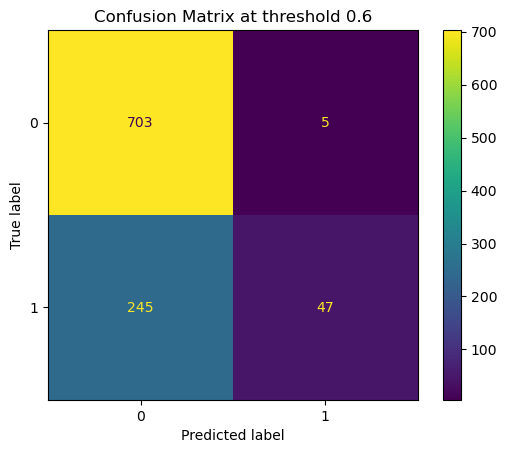

32/32 [==============================] - 0s 726us/step


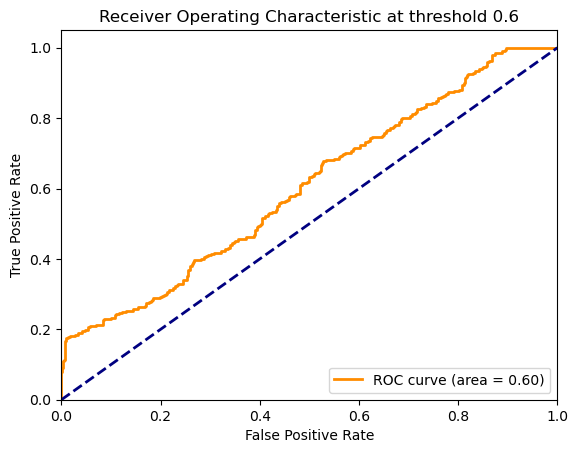

32/32 [==============================] - 0s 743us/step


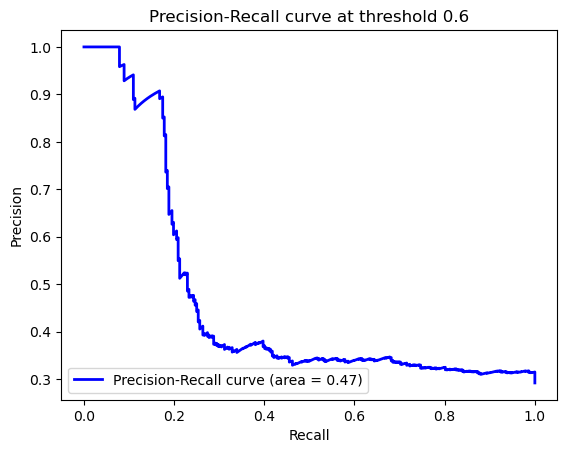


Evaluating threshold: 0.7
32/32 [==============================] - 0s 743us/step


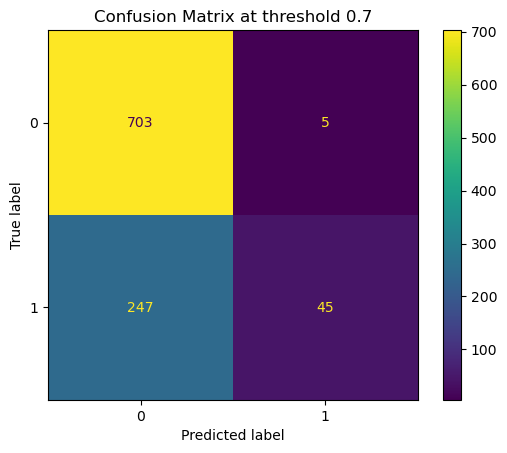

32/32 [==============================] - 0s 711us/step


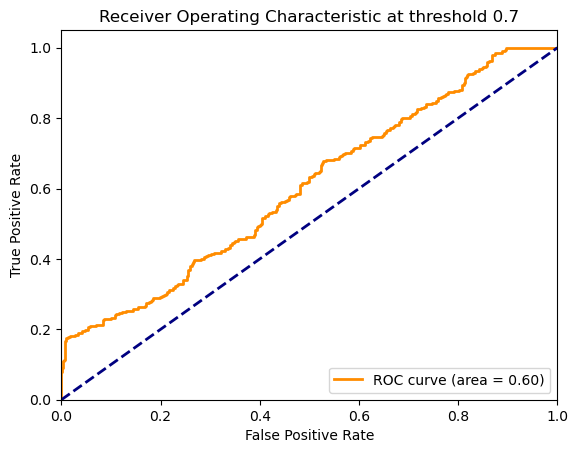

32/32 [==============================] - 0s 708us/step


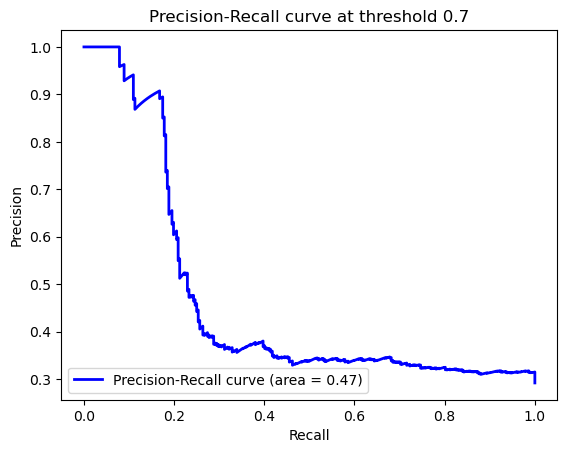


Evaluating threshold: 0.8
32/32 [==============================] - 0s 743us/step


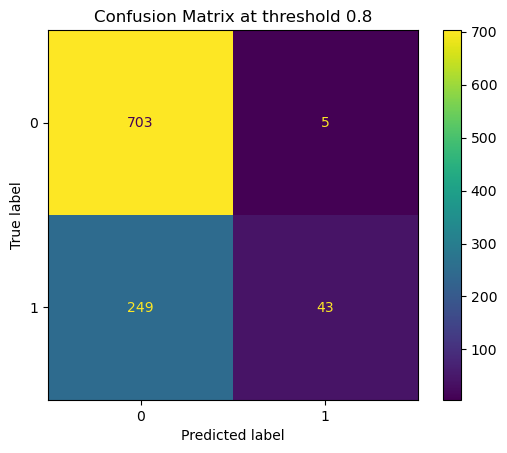

32/32 [==============================] - 0s 756us/step


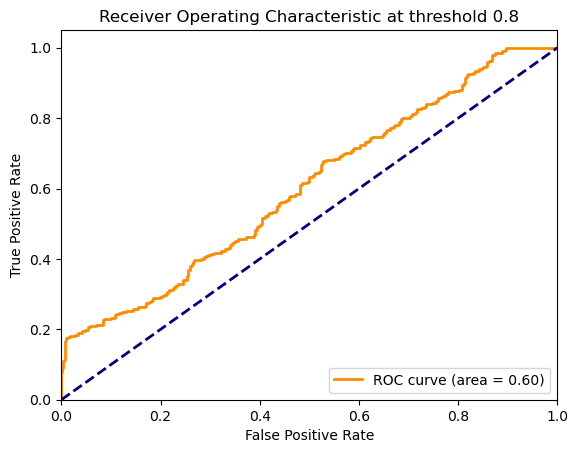

32/32 [==============================] - 0s 710us/step


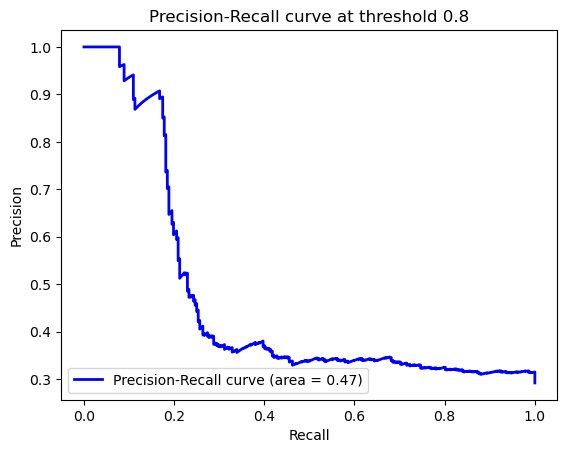


Evaluating threshold: 0.9
32/32 [==============================] - 0s 711us/step


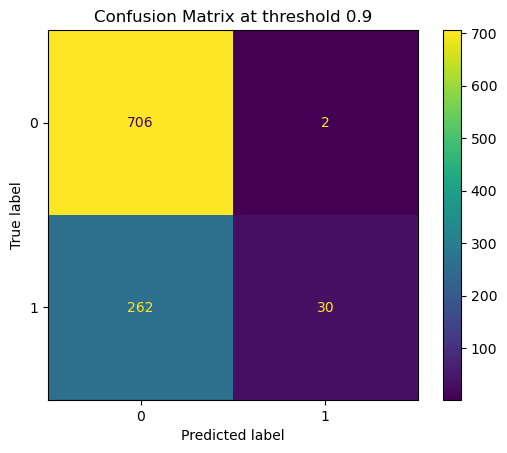

32/32 [==============================] - 0s 2ms/step


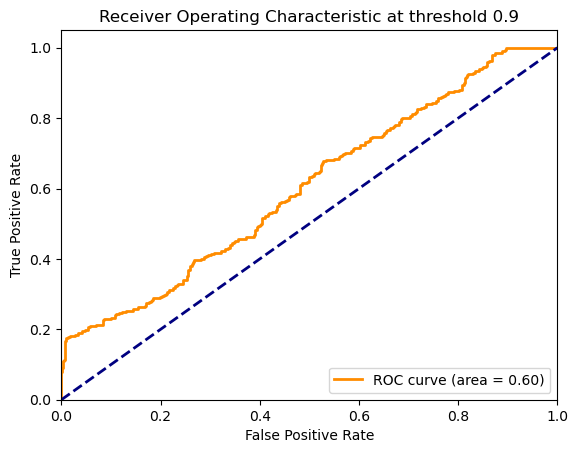

32/32 [==============================] - 0s 726us/step


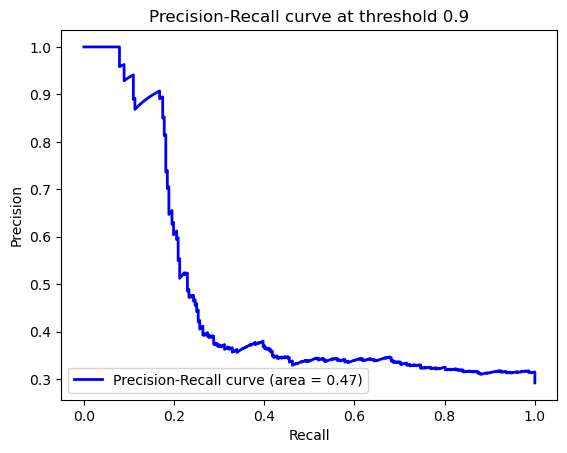

In [66]:
#The optimal treshold should have the highest F1 score, however, when also considering precision and recall 0.6, 0.7 and 0.8 look promising.
#lets try these three treshold and visualize their performances to try and improve the model
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score

# Load the dataset
absolute_path = str(os.path.abspath(''))
parent_path = os.path.dirname(absolute_path)
relative_path = "Datasets/UniversalBank.csv"
dataset_path = os.path.join(parent_path, relative_path)
print(dataset_path)

# Read the dataset
df = pd.read_csv(dataset_path)

# Before we do anything, let us pick our target variable.
X = df.drop(columns=['CreditCard'])
y = df['CreditCard']

# Since we are dealing with neural networks, let's do some preprocessing.
# Remove ID dimension
X = X.drop(columns=['ID'])

# Select numerical columns that we want standardized and categorical columns we want encoded
numerical_columns = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage']
categorical_columns = ['Personal Loan', 'Securities Account', 'CD Account', 'Online']

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Build the neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
trained_model = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Learning Curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(trained_model.history['accuracy'])
plt.plot(trained_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Evaluate different thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    print(f"\nEvaluating threshold: {threshold}")
    
    # Confusion Matrix
    y_pred = (model.predict(X_test) > threshold).astype("int32")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix at threshold {threshold}')
    plt.show()

    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic at threshold {threshold}')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, model.predict(X_test))
    average_precision = average_precision_score(y_test, model.predict(X_test))
    plt.figure()
    plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall curve at threshold {threshold}')
    plt.legend(loc="lower left")
    plt.show()

c:\Users\jordy\Data science\DSopdrachten\Datasets/UniversalBank.csv
32/32 [==============================] - 0s 696us/step


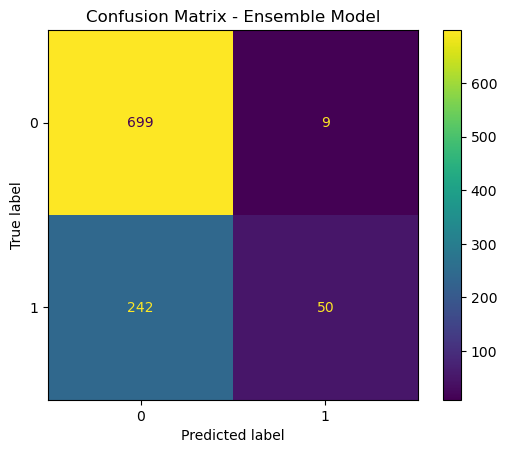

32/32 [==============================] - 0s 695us/step


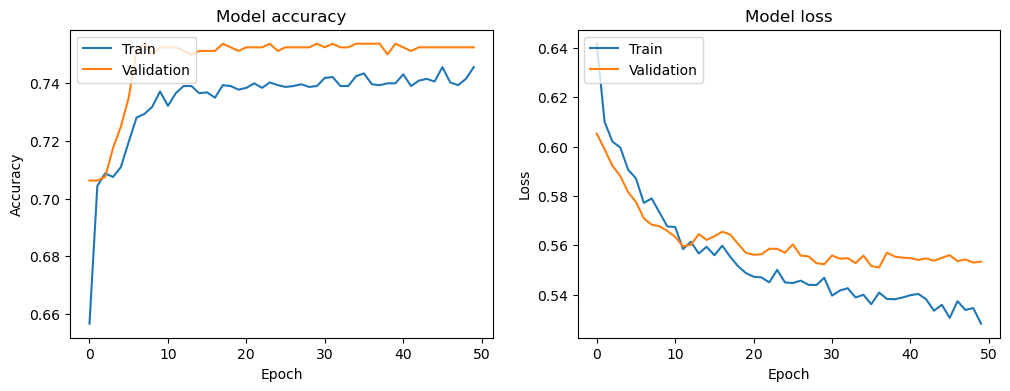

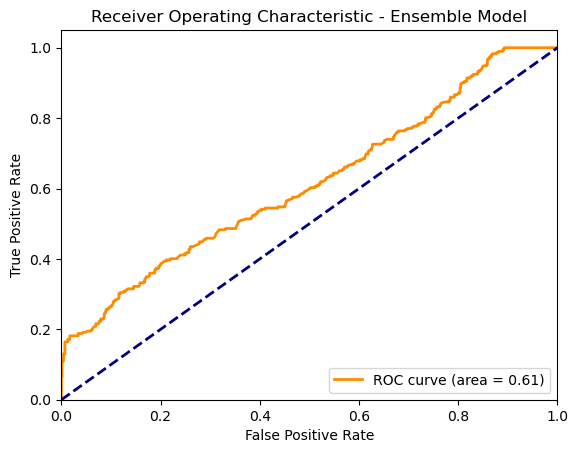

32/32 [==============================] - 0s 711us/step


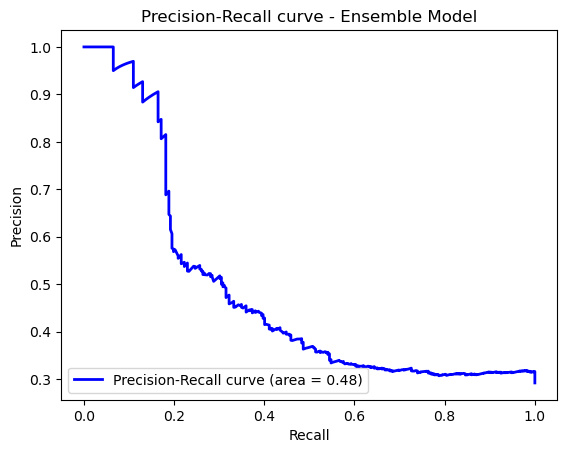

Logistic Regression:
[[700   8]
 [239  53]]
Random Forest:
[[632  76]
 [214  78]]
Neural Network:
32/32 [==============================] - 0s 712us/step
[[703   5]
 [242  50]]


In [78]:
#Not a single treshold provides very good results when trying to optimize for True positives and True negatives.
#Maybe finding the optimal Treshold is not the right direction to choose.
#Last thing I will try is to create and ensemble model based on the base model. 
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score

# Load the dataset
absolute_path = (str(os.path.abspath('')))
parent_path = os.path.dirname(absolute_path)
relative_path = "Datasets/UniversalBank.csv"
dataset_path = os.path.join(parent_path, relative_path)
print(dataset_path)

# Read the dataset
df = pd.read_csv(dataset_path)

# Before we do anything, let us pick our target variable.
X = df.drop(columns=['CreditCard'])
y = df['CreditCard']

# Remove ID column
X = X.drop(columns=['ID'])

# Select numerical columns that we want standardized and categorical columns we want encoded
numerical_columns = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage']
categorical_columns = ['Personal Loan', 'Securities Account', 'CD Account', 'Online']

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Feature Selection
selector = SelectKBest(f_classif, k=10)  # Adjust 'k' based on your dataset
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

# Define a function to create the neural network model (needed for KerasClassifier)
def create_model(optimizer='adam', activation='relu', dropout_rate=0.5, l2_lambda=0.01):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation=activation, kernel_regularizer=tf.keras.regularizers.l2(l2_lambda)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation=activation, kernel_regularizer=tf.keras.regularizers.l2(l2_lambda)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Custom Keras Classifier
class CustomKerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn=None, **kwargs):
        self.build_fn = build_fn
        self.kwargs = kwargs
        self.model_ = None

    def fit(self, X, y):
        self.model_ = self.build_fn(**self.kwargs)
        self.model_.fit(X, y, epochs=50, batch_size=32, verbose=0)
        return self

    def predict(self, X):
        proba = self.model_.predict(X)
        return (proba > 0.5).astype(int)

    def predict_proba(self, X):
        proba = self.model_.predict(X)
        return np.hstack((1 - proba, proba))

# Instantiate the custom KerasClassifier
keras_model = CustomKerasClassifier(build_fn=create_model)

# Define the base models
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier()

# Create the VotingClassifier with the custom wrapped Keras model
ensemble_model = VotingClassifier(estimators=[
    ('log_reg', log_reg), 
    ('rf_clf', rf_clf), 
    ('nn', keras_model)], voting='soft', n_jobs=1)  # Set n_jobs=1 to avoid parallel processing issues

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Evaluate the ensemble model
y_pred_ensemble = (ensemble_model.predict_proba(X_test)[:, 1] > 0.5).astype(int)
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ensemble)
disp.plot()
plt.title('Confusion Matrix - Ensemble Model')
plt.show()

# Learning Curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(trained_model.history['accuracy'])
plt.plot(trained_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# ROC Curve and AUC for the ensemble model
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, ensemble_model.predict_proba(X_test)[:, 1])
roc_auc_ensemble = auc(fpr_ensemble, tpr_ensemble)
plt.figure()
plt.plot(fpr_ensemble, tpr_ensemble, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_ensemble)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Ensemble Model')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve for the ensemble model
precision_ensemble, recall_ensemble, _ = precision_recall_curve(y_test, ensemble_model.predict_proba(X_test)[:, 1])
average_precision_ensemble = average_precision_score(y_test, ensemble_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(recall_ensemble, precision_ensemble, color='b', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision_ensemble)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve - Ensemble Model')
plt.legend(loc="lower left")
plt.show()

# Evaluate the base models individually for comparison
# First, fit the base models
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
keras_model.fit(X_train, y_train)

print("Logistic Regression:")
y_pred_log_reg = log_reg.predict(X_test)
print(confusion_matrix(y_test, y_pred_log_reg))

print("Random Forest:")
y_pred_rf_clf = rf_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf_clf))

print("Neural Network:")
y_pred_nn = keras_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_nn))

In [ ]:
#Once again, let's analyze our results.
#Firstly, let's analyze the accuracy and loss plots. 
    #Accuracy:
    #Validation Accuracy: ~0.75
    #Training Accuracy: ~0.73 
    #The validation and training accuracy are quite close to eachother, which indicates that the model is not
    #underfitting or overfitting significantly, which is good!

    #Loss:
    #Validation Loss: ~0.56
    #Training Loss: ~0.54
    #The validation and training loss are also quite close, which indicates that the model is pretty well generalized
    #which means that the model responds pretty well to unseen data.

#Secondly, the confusiong matrix
    #TN = 699
    #FP = 5
    #FN = 242
    #TP = 50
    #Here we see a similar trend as with the logistic regression, with an extremely high rate of False negatives (=240)
    #We might need to either address class imbalance or try to adjust the decision treshold.
    # I fear this might be futile, since doing this on the logistic regression part was pain.

#Thirdly, let's analyze our RoC
    #ROC curve = 0.61
    #This is expected from our confusion matrix, an roc curve of 0.61 is only slightly better than random guessing (AUC = 0.5), which means the model is bad and not
    #effectively differentiation between positives and negatives.
    #To combat this we might need to do some hyper parameter tuning, balancing or better feature selection.
    #I doubt this is due to over/underfitting since that would show in the accuracy/loss plots

#lastly, precion-recall curve
    # The precision recall curve gives an area of 0.48
    #similarly as the confusion matrix and RoC it shows that he model is not performing well at distinguishing between positive and negative.
    #To combat this we might need to try balancing, which I fear will prove futile, or we could try hyperparameter optimization and/or ensemble methods

#Conclusion
#The model shows minor improvements in validation accuracy and a significant reduction in false positives, 
# but the high rate of false negatives and the slight decrease in AUC and average precision indicate that there is still room for improvement.
#The improved model performs slightly better in certain aspects (like reducing false positives) but not in others (like detecting positives).

#What's next?
#1. As a last ditch effort, I would like to perform hyper parameter optimization to the ensemble model. If this fails I am done

In [ ]:
#I tried running this for 30 minutes, and decided to end it. Let's try a differend gridsearch method to improve runtime
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score

# Load the dataset
absolute_path = (str(os.path.abspath('')))
parent_path = os.path.dirname(absolute_path)
relative_path = "Datasets/UniversalBank.csv"
dataset_path = os.path.join(parent_path, relative_path)
print(dataset_path)

# Read the dataset
df = pd.read_csv(dataset_path)

# Before we do anything, let us pick our target variable.
X = df.drop(columns=['CreditCard'])
y = df['CreditCard']

# Remove ID column
X = X.drop(columns=['ID'])

# Select numerical columns that we want standardized and categorical columns we want encoded
numerical_columns = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage']
categorical_columns = ['Personal Loan', 'Securities Account', 'CD Account', 'Online']

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Feature Selection
selector = SelectKBest(f_classif, k=10)  # Adjust 'k' based on your dataset
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

# Define a function to create the neural network model (needed for KerasClassifier)
def create_model(optimizer='adam', activation='relu', dropout_rate=0.5, l2_lambda=0.01):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation=activation, kernel_regularizer=tf.keras.regularizers.l2(l2_lambda)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation=activation, kernel_regularizer=tf.keras.regularizers.l2(l2_lambda)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Custom Keras Classifier
class CustomKerasClassifier(KerasClassifier):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def fit(self, X, y, **kwargs):
        return super().fit(X, y, **kwargs)

    def predict(self, X, **kwargs):
        proba = super().predict(X, **kwargs)
        return (proba > 0.5).astype(int)

    def predict_proba(self, X, **kwargs):
        proba = super().predict_proba(X, **kwargs)
        return np.hstack((1 - proba, proba))

# Instantiate the custom KerasClassifier
keras_model = CustomKerasClassifier(build_fn=create_model, verbose=0)

# Define parameter grids for hyperparameter tuning
param_grid_lr = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_nn = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh'],
    'dropout_rate': [0.3, 0.5, 0.7],
    'l2_lambda': [0.01, 0.001, 0.0001],
    'epochs': [50, 100],
    'batch_size': [32, 64]
}

# Hyperparameter tuning for Logistic Regression
grid_search_lr = GridSearchCV(estimator=log_reg, param_grid=param_grid_lr, cv=3, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_

# Hyperparameter tuning for Random Forest
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

# Hyperparameter tuning for Neural Network
grid_search_nn = GridSearchCV(estimator=keras_model, param_grid=param_grid_nn, cv=3, scoring='accuracy')
grid_search_nn.fit(X_train, y_train)
best_nn = grid_search_nn.best_estimator_

# Create the VotingClassifier with the best estimators
ensemble_model = VotingClassifier(estimators=[
    ('log_reg', best_lr), 
    ('rf_clf', best_rf), 
    ('nn', best_nn)], voting='soft', n_jobs=1)  # Set n_jobs=1 to avoid parallel processing issues

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Evaluate the ensemble model
y_pred_ensemble = (ensemble_model.predict_proba(X_test)[:, 1] > 0.5).astype(int)
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ensemble)
disp.plot()
plt.title('Confusion Matrix - Ensemble Model')
plt.show()

# Learning Curves for the Neural Network
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(best_nn.model_.history['accuracy'])
plt.plot(best_nn.model_.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(best_nn.model_.history['loss'])
plt.plot(best_nn.model_.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# ROC Curve and AUC for the ensemble model
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, ensemble_model.predict_proba(X_test)[:, 1])
roc_auc_ensemble = auc(fpr_ensemble, tpr_ensemble)
plt.figure()
plt.plot(fpr_ensemble, tpr_ensemble, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_ensemble)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Ensemble Model')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve for the ensemble model
precision_ensemble, recall_ensemble, _ = precision_recall_curve(y_test, ensemble_model.predict_proba(X_test)[:, 1])
average_precision_ensemble = average_precision_score(y_test, ensemble_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(recall_ensemble, precision_ensemble, color='b', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision_ensemble)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve - Ensemble Model')
plt.legend(loc="lower left")
plt.show()

# Evaluate the base models individually for comparison
print("Logistic Regression:")
y_pred_log_reg = best_lr.predict(X_test)
print(confusion_matrix(y_test, y_pred_log_reg))

print("Random Forest:")
y_pred_rf_clf = best_rf.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf_clf))

print("Neural Network:")
y_pred_nn = best_nn.predict(X_test)
print(confusion_matrix(y_test, y_pred_nn))

c:\Users\jordy\Data science\DSopdrachten\Datasets/UniversalBank.csv


c:\Users\jordy\anaconda3\envs\DataScience\lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


32/32 [==============================] - 0s 923us/step


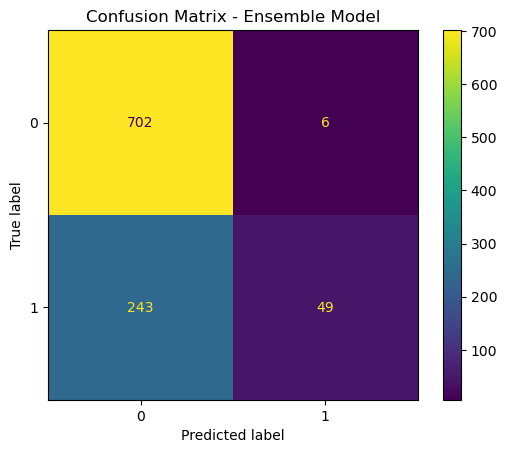

32/32 [==============================] - 0s 864us/step


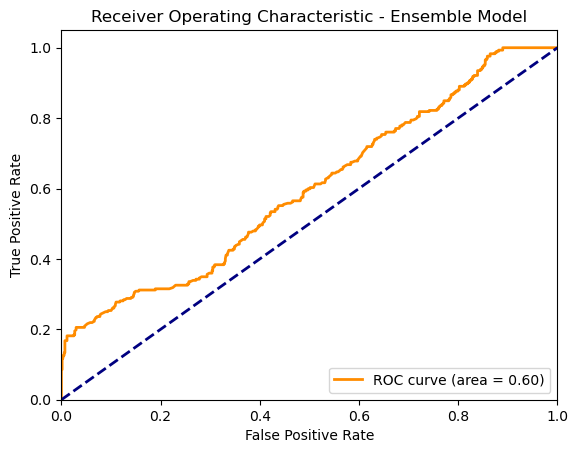

32/32 [==============================] - 0s 827us/step


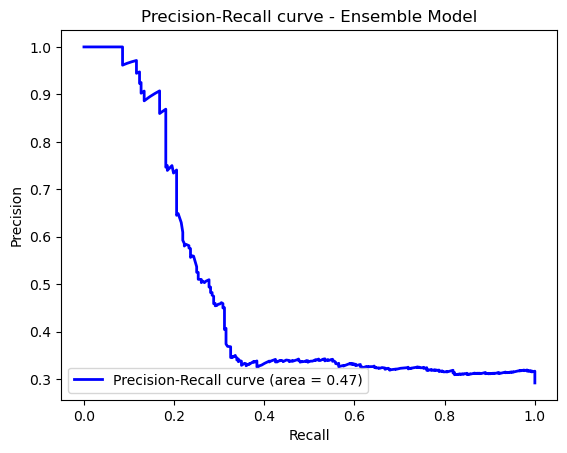

Logistic Regression:
[[700   8]
 [239  53]]
Random Forest:
[[703   5]
 [245  47]]
Neural Network:
32/32 [==============================] - 0s 1ms/step
[[700   8]
 [239  53]]


In [87]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score
from scipy.stats import uniform, randint

# Load the dataset
absolute_path = (str(os.path.abspath('')))
parent_path = os.path.dirname(absolute_path)
relative_path = "Datasets/UniversalBank.csv"
dataset_path = os.path.join(parent_path, relative_path)
print(dataset_path)

# Read the dataset
df = pd.read_csv(dataset_path)

# Before we do anything, let us pick our target variable.
X = df.drop(columns=['CreditCard'])
y = df['CreditCard']

# Remove ID column
X = X.drop(columns=['ID'])

# Select numerical columns that we want standardized and categorical columns we want encoded
numerical_columns = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage']
categorical_columns = ['Personal Loan', 'Securities Account', 'CD Account', 'Online']

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Feature Selection
selector = SelectKBest(f_classif, k=10)  # Adjust 'k' based on your dataset
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

# Define a function to create the neural network model (needed for KerasClassifier)
def create_model(optimizer='adam', activation='relu', dropout_rate=0.5, l2_lambda=0.01):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation=activation, kernel_regularizer=tf.keras.regularizers.l2(l2_lambda)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation=activation, kernel_regularizer=tf.keras.regularizers.l2(l2_lambda)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Custom Keras Classifier Wrapper
class CustomKerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, optimizer='adam', activation='relu', dropout_rate=0.5, l2_lambda=0.01, epochs=50, batch_size=32, verbose=0):
        self.optimizer = optimizer
        self.activation = activation
        self.dropout_rate = dropout_rate
        self.l2_lambda = l2_lambda
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model_ = None

    def fit(self, X, y):
        self.model_ = create_model(optimizer=self.optimizer, activation=self.activation, dropout_rate=self.dropout_rate, l2_lambda=self.l2_lambda)
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        return self

    def predict(self, X):
        proba = self.model_.predict(X)
        return (proba > 0.5).astype(int)

    def predict_proba(self, X):
        proba = self.model_.predict(X)
        return np.hstack((1 - proba, proba))

    def get_params(self, deep=True):
        return {"optimizer": self.optimizer, "activation": self.activation, "dropout_rate": self.dropout_rate, "l2_lambda": self.l2_lambda, "epochs": self.epochs, "batch_size": self.batch_size, "verbose": self.verbose}

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

# Instantiate the custom KerasClassifier
keras_model = CustomKerasClassifier()

# Define parameter grids for hyperparameter tuning
param_grid_lr = {
    'C': uniform(0.1, 10.0),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

param_grid_rf = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 11)
}

param_grid_nn = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh'],
    'dropout_rate': uniform(0.3, 0.7),
    'l2_lambda': uniform(0.0001, 0.01),
    'epochs': [50, 100],
    'batch_size': [32, 64]
}

# Hyperparameter tuning for Logistic Regression
grid_search_lr = RandomizedSearchCV(estimator=log_reg, param_distributions=param_grid_lr, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_

# Hyperparameter tuning for Random Forest
grid_search_rf = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_grid_rf, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

# Hyperparameter tuning for Neural Network
grid_search_nn = RandomizedSearchCV(estimator=keras_model, param_distributions=param_grid_nn, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_nn.fit(X_train, y_train)
best_nn = grid_search_nn.best_estimator_

# Create the VotingClassifier with the best estimators
ensemble_model = VotingClassifier(estimators=[
    ('log_reg', best_lr), 
    ('rf_clf', best_rf), 
    ('nn', best_nn)], voting='soft', n_jobs=1)  # Set n_jobs=1 to avoid parallel processing issues

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Evaluate the ensemble model
y_pred_ensemble = (ensemble_model.predict_proba(X_test)[:, 1] > 0.5).astype(int)
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ensemble)
disp.plot()
plt.title('Confusion Matrix - Ensemble Model')
plt.show()

# ROC Curve and AUC for the ensemble model
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, ensemble_model.predict_proba(X_test)[:, 1])
roc_auc_ensemble = auc(fpr_ensemble, tpr_ensemble)
plt.figure()
plt.plot(fpr_ensemble, tpr_ensemble, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_ensemble)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Ensemble Model')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve for the ensemble model
precision_ensemble, recall_ensemble, _ = precision_recall_curve(y_test, ensemble_model.predict_proba(X_test)[:, 1])
average_precision_ensemble = average_precision_score(y_test, ensemble_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(recall_ensemble, precision_ensemble, color='b', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision_ensemble)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve - Ensemble Model')
plt.legend(loc="lower left")
plt.show()

# Evaluate the base models individually for comparison
print("Logistic Regression:")
y_pred_log_reg = best_lr.predict(X_test)
print(confusion_matrix(y_test, y_pred_log_reg))

print("Random Forest:")
y_pred_rf_clf = best_rf.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf_clf))

print("Neural Network:")
y_pred_nn = best_nn.predict(X_test)
print(confusion_matrix(y_test, y_pred_nn))

In [ ]:
#Well here we are, and it actually performs worse than the non hyperparameter optimized ensemble model. So let's conclude
#The most effective model is the hyperparameterized neural network. It has the best accuracy and best amount of true negative predictions.
#However, all models tested today are not great and should not be used in a production environment. 
#I could probably improve the model even more, but I frankly have no clue how and am confident I have tried everything within my knowledge.